In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('data/InstitutionData2020-2021.csv')
df.head(3)

/var/folders/k2/4kxlmrg53cd6kcm7w7j5g8nm0000gn/T/ipykernel_37541/774778045.py:1: DtypeWarning: Columns (9,1537,1540,1542,1606,1608,1614,1615,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1703,1704,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2958) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('InstitutionData2020-2021.csv')


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,BBRR4_PP_MALE_DISCHARGE,BBRR4_PP_NOMALE_N,BBRR4_PP_NOMALE_DFLT,BBRR4_PP_NOMALE_DLNQ,BBRR4_PP_NOMALE_FBR,BBRR4_PP_NOMALE_DFR,BBRR4_PP_NOMALE_NOPROG,BBRR4_PP_NOMALE_MAKEPROG,BBRR4_PP_NOMALE_PAIDINFULL,BBRR4_PP_NOMALE_DISCHARGE
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.05-0.09,429,0.15-0.19,<=0.05,0.50-0.54,0.10-0.14,<=0.05,<=0.05,<=0.05,0.05-0.09
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,<=0.10,402,<=0.10,<=0.10,0.40-0.49,0.10-0.19,<=0.10,<=0.10,0.10-0.19,<=0.10
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed


In [3]:
df.columns[0:20]

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL', 'SCH_DEG', 'HCM2', 'MAIN',
       'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL', 'ST_FIPS', 'REGION',
       'LOCALE'],
      dtype='object')

# Columns for analysis

1. UNITID
2. INSTNM
3. CITY
4. STABBR
5. ZIP
6. SCH_DEG
7. PREDDEG
8. HIGHDEG
9. CONTROL
10. REGION
11. COSTT4_A
12. TUITION_IN
13. NPT4_PUB & NPT4_PRIV
14. TUITFTE
15. INEXPFTE
16. AVGFACSAL
17. LOCALE
18. LOCALE2

In [4]:
df_cleaned = df[[
    'UNITID',
    'INSTNM',
    'CITY',
    'STABBR',
    'ZIP',
    'SCH_DEG',
    'PREDDEG',
    'HIGHDEG',
    'CONTROL',
    'REGION',
    'COSTT4_A',
    'TUITIONFEE_IN',
    'TUITIONFEE_OUT',
    'NPT4_PUB',
    'NPT4_PRIV',
    'TUITFTE',
    'INEXPFTE',
    'AVGFACSAL',
    'LOCALE',
    'LOCALE2'
]]

In [5]:
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,BBRR4_PP_MALE_DISCHARGE,BBRR4_PP_NOMALE_N,BBRR4_PP_NOMALE_DFLT,BBRR4_PP_NOMALE_DLNQ,BBRR4_PP_NOMALE_FBR,BBRR4_PP_NOMALE_DFR,BBRR4_PP_NOMALE_NOPROG,BBRR4_PP_NOMALE_MAKEPROG,BBRR4_PP_NOMALE_PAIDINFULL,BBRR4_PP_NOMALE_DISCHARGE
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.05-0.09,429,0.15-0.19,<=0.05,0.50-0.54,0.10-0.14,<=0.05,<=0.05,<=0.05,0.05-0.09
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,<=0.10,402,<=0.10,<=0.10,0.40-0.49,0.10-0.19,<=0.10,<=0.10,0.10-0.19,<=0.10
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,<=0.10,127,0.10-0.19,<=0.10,0.40-0.49,<=0.10,<=0.10,<=0.10,0.10-0.19,<=0.10
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.05-0.09,500,0.20-0.24,<=0.05,0.45-0.49,0.10-0.14,0.05-0.09,<=0.05,<=0.05,0.05-0.09


In [6]:
df_cleaned.isna().sum()

UNITID               0
INSTNM               0
CITY                 0
STABBR               0
ZIP                  0
SCH_DEG            366
PREDDEG              0
HIGHDEG              0
CONTROL              0
REGION               0
COSTT4_A          3240
TUITIONFEE_IN     2756
TUITIONFEE_OUT    2756
NPT4_PUB          4723
NPT4_PRIV         3068
TUITFTE            519
INEXPFTE           519
AVGFACSAL         2643
LOCALE             497
LOCALE2           6543
dtype: int64

In [7]:
total = df_cleaned.shape[0]

In [8]:
total

6543

In [9]:
df_cleaned.isna().sum() / total * 100

UNITID              0.000000
INSTNM              0.000000
CITY                0.000000
STABBR              0.000000
ZIP                 0.000000
SCH_DEG             5.593764
PREDDEG             0.000000
HIGHDEG             0.000000
CONTROL             0.000000
REGION              0.000000
COSTT4_A           49.518569
TUITIONFEE_IN      42.121351
TUITIONFEE_OUT     42.121351
NPT4_PUB           72.184013
NPT4_PRIV          46.889806
TUITFTE             7.932141
INEXPFTE            7.932141
AVGFACSAL          40.394315
LOCALE              7.595904
LOCALE2           100.000000
dtype: float64

Columns to drop:
- Locale2
- NPT4_PUB

"Highest degree awarded
 0 Non-degree-granting
 1 Certificate degree
 2 Associate degree
 3 Bachelor's degree
 4 Graduate degree"

Algo:
1. Remove HIGHDEG 0 & 1.
2. Grab all zip codes.
3. Subset the data by zip code.
4. Impute missing values with median of that zip code.

In [10]:
df_cleaned = df_cleaned.drop(columns=['NPT4_PUB', 'LOCALE2'])

In [11]:
# drop institutions that dont offer AA or higher
degrees = [2, 3, 4]
df_cleaned = df_cleaned[df_cleaned['HIGHDEG'].isin(degrees)]

In [12]:
# Check to see if degrees are present
df_cleaned['HIGHDEG'].unique()

array([4, 2, 3])

In [13]:
zipcodes = df_cleaned['ZIP'].unique()

In [14]:
len(zipcodes)

3725

In [15]:
df['HIGHDEG'].dtype

dtype('int64')

In [44]:
# Function to impute median into missing values
def impute_missing_values(df, zipcodes) -> object:

    df_copy = df.copy()

    cols = df.columns

    for zipcode in zipcodes:

        # subset to that zipcode
        subset_df = df_copy[df_copy['ZIP'] == zipcode]

        for col in cols:
            # Check if col is int/float
            if df_copy[col].isnull().any() and df_copy[col].dtype == int or df_copy[col].dtype == float:
                # calculate median
                median_val = subset_df[col].median()


                df_copy.loc[df_copy['ZIP'] == zipcode, col] = subset_df[col].fillna(median_val)

    return df_copy

In [45]:
df_copy = impute_missing_values(df_cleaned, zipcodes)

/Users/dickinsonjo/repos/CollegePriceTransparency/.venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/dickinsonjo/repos/CollegePriceTransparency/.venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/dickinsonjo/repos/CollegePriceTransparency/.venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/dickinsonjo/repos/CollegePriceTransparency/.venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/dickinsonjo/repos/CollegePriceTransparency/.venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.

In [46]:
df_copy.isna().sum() / total * 100

UNITID             0.000000
INSTNM             0.000000
CITY               0.000000
STABBR             0.000000
ZIP                0.000000
SCH_DEG            2.063274
PREDDEG            0.000000
HIGHDEG            0.000000
CONTROL            0.000000
REGION             0.000000
COSTT4_A          10.408070
TUITIONFEE_IN      8.726884
TUITIONFEE_OUT     8.726884
NPT4_PRIV         30.383616
TUITFTE            0.091701
INEXPFTE           0.091701
AVGFACSAL          1.650619
LOCALE             0.000000
dtype: float64

In [47]:
# check if some zipcodes are entirely null
cols = df_copy.columns

for zipcode in zipcodes:

    subset_df = df_copy[df_copy['ZIP'] == zipcode]

    for col in cols:

        if subset_df[col].isnull().any():
            print(subset_df)


   UNITID                    INSTNM    CITY STABBR    ZIP  SCH_DEG  PREDDEG  \
0  100654  Alabama A & M University  Normal     AL  35762      3.0        3   

   HIGHDEG  CONTROL  REGION  COSTT4_A  TUITIONFEE_IN  TUITIONFEE_OUT  \
0        4        1       5   21924.0        10024.0         18634.0   

   NPT4_PRIV  TUITFTE  INEXPFTE  AVGFACSAL  LOCALE  
0        NaN   9243.0    7699.0     8779.0    12.0  
   UNITID                               INSTNM        CITY STABBR         ZIP  \
1  100663  University of Alabama at Birmingham  Birmingham     AL  35294-0110   

   SCH_DEG  PREDDEG  HIGHDEG  CONTROL  REGION  COSTT4_A  TUITIONFEE_IN  \
1      3.0        3        4        1       5   26248.0         8568.0   

   TUITIONFEE_OUT  NPT4_PRIV  TUITFTE  INEXPFTE  AVGFACSAL  LOCALE  
1         20400.0        NaN  11678.0   14264.0    11590.0    12.0  
   UNITID              INSTNM        CITY STABBR         ZIP  SCH_DEG  \
2  100690  Amridge University  Montgomery     AL  36117-3553      3

In [48]:
# drop 0, and 9 regions
regions = list(range(1,9))
df_regions_dropped = df_copy[df_copy['REGION'].isin(regions)]

In [50]:
df_regions_dropped['REGION'].unique()

array([5, 8, 6, 4, 7, 1, 2, 3])

***COSTT4_A:*** The average annual total cost of attendance, including tuition and fees, books and supplies, and living expenses for all full-time, first-time, degree/certificate-seeking undergraduates who receive Title IV aid. It is calculated from values in the IPEDS Institutional Characteristics and Student Financial Aid components. Separate metrics are calculated for academic-year institutions and program-year institutions. For academic-year institutions, average cost of attendance represents an average of all programs and includes only full-time, first-time, degree/certificate-seeking undergraduates who first enrolled in the fall term. For non-academic-year institutions (program or continuous enrollment), average cost of attendance represents the program with the largest enrollment at the institution, and it includes full-time, first-time, degree/certificate-seeking undergraduates who first enrolled at any time during the academic year. For programs less than 1 year in length (see LPROGRAM), this represents the cost for the full program.

<Axes: >

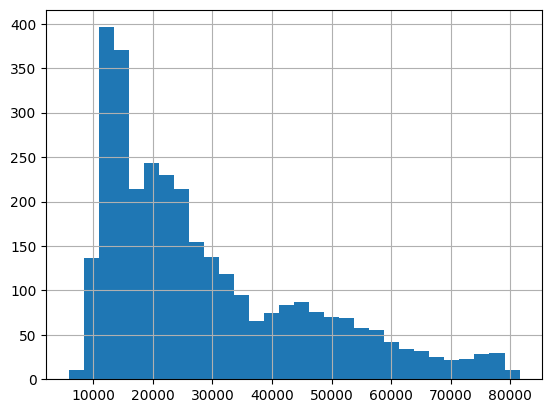

In [52]:
df_regions_dropped.COSTT4_A.hist(bins=30)

In [53]:
df_regions_dropped.COSTT4_A.max()

81531.0

In [54]:
df_regions_dropped[df_regions_dropped['COSTT4_A'] == 81531.0]

,UNITID,INSTNM,CITY,STABBR,ZIP,SCH_DEG,PREDDEG,HIGHDEG,CONTROL,REGION,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,NPT4_PRIV,TUITFTE,INEXPFTE,AVGFACSAL,LOCALE
860,144014,Chicago Theological Seminary,Chicago,IL,60637,3.0,4,4,2,3,81531.0,62241.0,62241.0,22690.0,18695.0,24213.0,7471.0,11.0
861,144050,University of Chicago,Chicago,IL,60637,3.0,3,4,2,3,81531.0,62241.0,62241.0,22690.0,31559.0,78564.0,17550.0,11.0
4475,443702,Bexley Hall Seabury Western Theological Semina...,Chicago,IL,60637,3.0,4,4,2,3,81531.0,62241.0,62241.0,22690.0,11611.0,27040.0,7559.0,11.0
4525,445054,Toyota Technological Institute at Chicago,Chicago,IL,60637,3.0,4,4,2,3,81531.0,62241.0,62241.0,22690.0,18695.0,27040.0,7559.0,11.0


In [56]:
df[df['ZIP'] == '60637']['COSTT4_A']

860         NaN
861     81531.0
4475        NaN
4525        NaN
Name: COSTT4_A, dtype: float64

In [58]:
df_regions_dropped.groupby('STABBR').median().sort_values(by='COSTT4_A', ascending=False)

/var/folders/k2/4kxlmrg53cd6kcm7w7j5g8nm0000gn/T/ipykernel_37541/1917305813.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_regions_dropped.groupby('STABBR').median().sort_values(by='COSTT4_A', ascending=False)


,UNITID,SCH_DEG,PREDDEG,HIGHDEG,CONTROL,REGION,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,NPT4_PRIV,TUITFTE,INEXPFTE,AVGFACSAL,LOCALE
STABBR,,,,,,,,,,,,,,
RI,217479.5,3.0,3.0,4.0,2.0,1.0,53210.0,36324.0,36324.0,34541.5,19622.5,11672.0,10505.0,17.0
MA,166674.0,3.0,3.0,4.0,2.0,1.0,50598.0,36125.0,36789.0,27849.0,17155.0,10642.0,8605.0,21.0
VT,231027.0,3.0,3.0,4.0,2.0,1.0,43948.0,29173.5,41092.0,27562.0,18628.5,11809.0,7281.0,36.5
PA,214883.0,3.0,3.0,4.0,2.0,2.0,35607.0,23102.0,25993.0,23218.0,13837.0,9614.0,7150.0,21.0
IN,151719.0,3.0,3.0,4.0,2.0,3.0,34541.0,18214.5,27858.0,20893.0,12747.0,9022.0,7006.0,13.0
IA,153658.0,3.0,3.0,3.0,2.0,4.0,30350.0,19718.0,20940.0,21699.0,11634.0,9007.0,6673.0,21.0
NH,183105.0,3.0,3.0,3.0,1.0,1.0,28649.5,15582.5,24016.0,26301.5,10158.0,9166.0,7287.5,31.0
DC,131839.5,3.0,3.0,4.0,2.0,2.0,28571.5,17018.5,17018.5,22616.0,14734.0,15026.5,9405.0,11.0
TN,221374.0,3.0,3.0,4.0,2.0,5.0,28351.0,15804.0,18076.0,22003.0,10869.0,6896.0,6261.5,12.0


In [60]:
df_regions_dropped.corr()

/var/folders/k2/4kxlmrg53cd6kcm7w7j5g8nm0000gn/T/ipykernel_37541/4101670959.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_regions_dropped.corr()


,UNITID,SCH_DEG,PREDDEG,HIGHDEG,CONTROL,REGION,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,NPT4_PRIV,TUITFTE,INEXPFTE,AVGFACSAL,LOCALE
UNITID,1.000000,-0.164195,-0.090842,-0.094253,0.440760,0.098731,-0.052718,-0.069133,-0.149126,-0.063343,0.099919,-0.081300,-0.265412,-0.111387
SCH_DEG,-0.164195,1.000000,0.852196,0.770543,-0.027147,-0.175082,0.495730,0.477061,0.527719,-0.012159,0.309606,0.182388,0.326127,-0.091020
PREDDEG,-0.090842,0.852196,1.000000,0.777870,0.035113,-0.124430,0.503433,0.479627,0.520664,-0.003568,0.353516,0.233787,0.304471,-0.129769
HIGHDEG,-0.094253,0.770543,0.777870,1.000000,0.113222,-0.096344,0.528523,0.490052,0.542296,0.093272,0.378122,0.187755,0.307485,-0.196207
CONTROL,0.440760,-0.027147,0.035113,0.113222,1.000000,0.028558,0.507585,0.491040,0.300974,0.116847,0.458398,-0.062419,-0.298009,-0.288088
REGION,0.098731,-0.175082,-0.124430,-0.096344,0.028558,1.000000,-0.182559,-0.226989,-0.197673,0.084925,-0.113472,-0.069369,-0.025908,-0.069517
COSTT4_A,-0.052718,0.495730,0.503433,0.528523,0.507585,-0.182559,1.000000,0.970885,0.918666,0.624005,0.737265,0.383003,0.318850,-0.190154
TUITIONFEE_IN,-0.069133,0.477061,0.479627,0.490052,0.491040,-0.226989,0.970885,1.000000,0.934369,0.500745,0.679060,0.375921,0.299326,-0.175128
TUITIONFEE_OUT,-0.149126,0.527719,0.520664,0.542296,0.300974,-0.197673,0.918666,0.934369,1.000000,0.502183,0.630246,0.421286,0.468913,-0.189619
NPT4_PRIV,-0.063343,-0.012159,-0.003568,0.093272,0.116847,0.084925,0.624005,0.500745,0.502183,1.000000,0.423732,0.102270,0.323186,-0.124717


/var/folders/k2/4kxlmrg53cd6kcm7w7j5g8nm0000gn/T/ipykernel_37541/2431862976.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_regions_dropped.corr()


<Axes: >

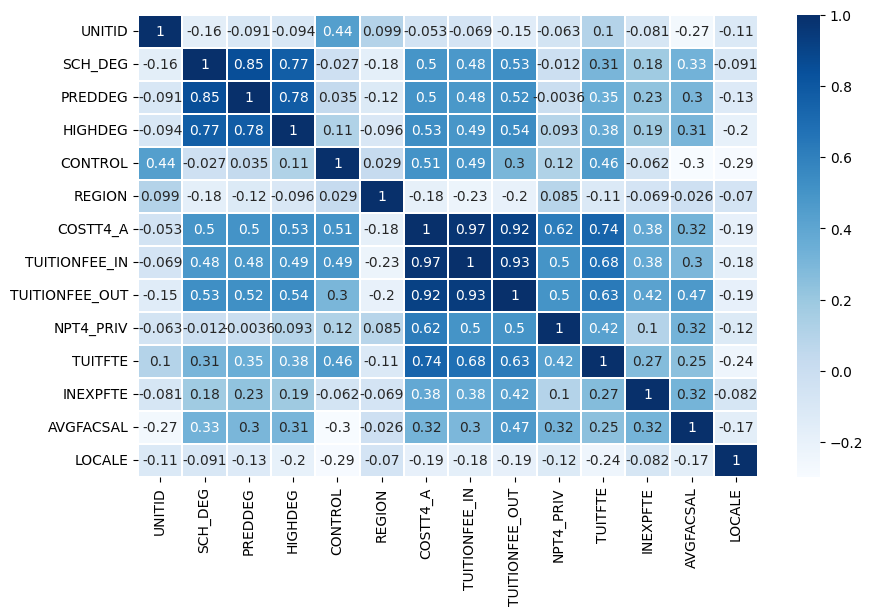

In [63]:
correlations = df_regions_dropped.corr()

_, ax = plt.subplots(figsize=(10,6))

sns.heatmap(correlations, cmap='Blues', annot=True, linewidths=1.25)

<Axes: xlabel='COSTT4_A', ylabel='TUITFTE'>

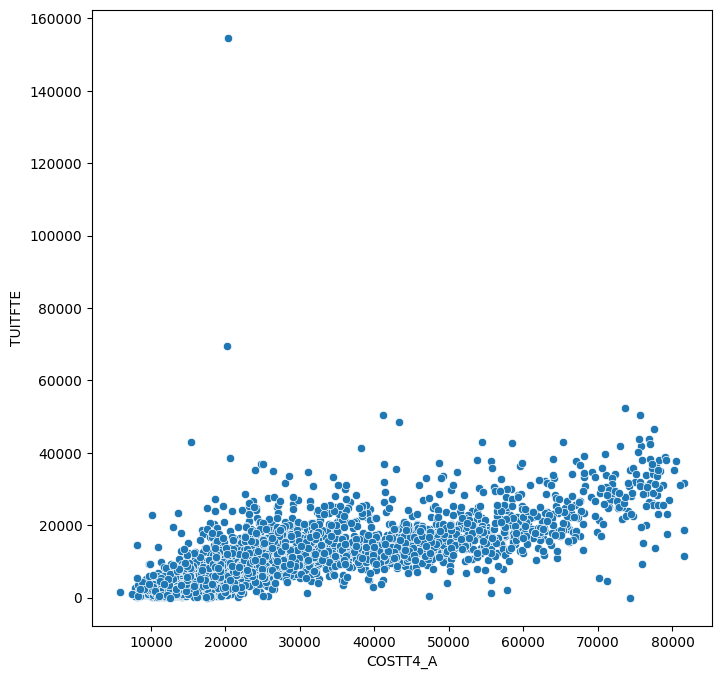

In [67]:
_, ax = plt.subplots(figsize=(8,8))

sns.scatterplot(ax=ax, data=df_regions_dropped, x="COSTT4_A", y="TUITFTE")